#### ▶ **Candidate Numbers: 15, 18, 17, 33, 42**

# **Jupyter Notebook 6: Impact of Activation Function**



---


**Experiment with 3 different activation functions**


*   ReLU Activation Function
*   Leaky ReLU Activation Function
*   Leaky ReLU Activation Function




🌿  We decided that the Jupyter notebook will contain a total of 6 sections, each dedicated to a separate experiment for easier navigation, as outlined below:


| Total number of Notebook: 6                         | Content                                                                                   |
|------------------------------------|-------------------------------------------------------------------------------------------|
|Jupyter Notebook 1: Master U-Net Workflow              | Data preparation, U-Net implementation, training, and evaluation                           |
|Jupyter Notebook 2: Impact of Image Resolution      | Experiment with 3 different image resolutions and track performance                          |
|Jupyter Notebook 3: Impact of Data Augmentation     | Experiment with data augmentation techniques (3 augmentation with vs. without augmentation)               |
|Jupyter Notebook 4: Impact of Training Data Size    | Experiment with 3 different training data sizes                      |
|Jupyter Notebook 5: Impact of Optimizer             | Experiment with 3 different optimizers (Adam, SGD, RMSprop)                                  |
|**Jupyter Notebook 6:** **Impact of Activation Function**   | **Experiment with 3 different activation functions (ReLU, Leaky Tanh with Sigmoid**)           |


# **Install Required Libaries:**

---



In [ ]:
!pip install torch torchvision
!pip install torchsummary
!pip install segmentation_models_pytorch
!pip install wandb

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.5 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=7a70ad212336d0ee8664d1f7a03f69414631fc1405debb53b02e732f9143c0ef
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=6e37d79609465222650eaa71a0200e5301671efb981868fa7b8a40395fa0e811
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch

In [ ]:
import os
from PIL import Image
import albumentations as A
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from albumentations.pytorch import ToTensorV2
import torch
import wandb
from torch.utils.data import Dataset
from albumentations import Compose
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.optim.lr_scheduler as lr_scheduler

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# **Check if CUDA device exists, use that. If not default to CPU:**

---



In [ ]:
# If CUDA device exist, use that. If not default to CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#🍀 **Wandb Installation**

---



In [ ]:
!pip install wandb
!wandb login
import wandb

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc




---


# 🍀 **Data Pipeline**


---





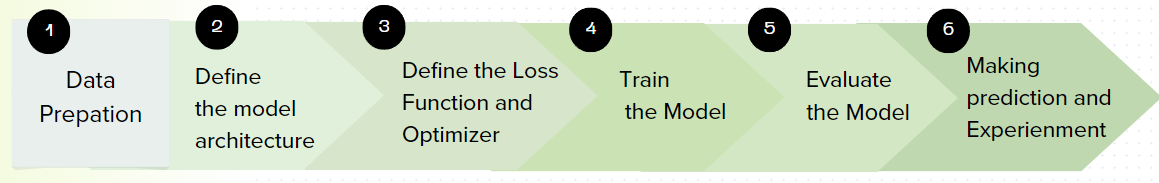



---

# **1. Prepare the Dataset:**

---



## **1.1) Extract images and masks tar.gz files :**




▶ **Extract images and masks tar.gz files**

In [ ]:
with tarfile.open('/content/images.tar.gz', 'r:gz') as tar:
    tar.extractall('/content/images')
with tarfile.open('/content/masks.tar.gz', 'r:gz') as tar:
    tar.extractall('/content/masks')


▶ **Get the list of files in each directory and print their counts**

In [ ]:
images_dir = '/content/images/images'
masks_dir = '/content/masks/masks'

images_list = os.listdir(images_dir)
masks_list = os.listdir(masks_dir)

print(f"Number of images: {len(images_list)}")
print(f"Number of masks: {len(masks_list)}")
print(f".............................")
print(f"Images directories contents: {images_list[:10]}")
print(f"Masks directories contents: {masks_list[:10]}")

Number of images: 590
Number of masks: 590
.............................
Images directories contents: ['ckcuhqpeh001k3b5yg9ebvymx.jpg', 'ckcudd247000m3b5yjxgxd6vp.jpg', 'ckd03rjy4001q3b5y7kbvpqhm.jpg', 'ckcuhathy000y3b5yztf7bt9k.jpg', 'ckd04mx29000a3b5yxzr181jz.jpg', 'ckd4jcl8s00123b5yifl4o1dp.jpg', 'ckcx9ub1g00263b5ypitagqy9.jpg', 'ckd498dpe000c3b5y7ma9aibh.jpg', 'ckcud80aw000f3b5yjerqwsbq.jpg', 'ckcvwqk1z001d3b5y3q8bouy2.jpg']
Masks directories contents: ['ckd09bezs000c3b5yy33w0pw6.png', 'ckcua4qo3000w3b5yz2oxtkud.png', 'ckd034o6w000v3b5yq5tp0328.png', 'ckcui0yhw00033b5yqa3jsh9t.png', 'ckd092yf800013b5yhq7orv0b.png', 'ckd4il4jl00093b5y9rlfydho.png', 'ckcx9selb00233b5ya9d409ni.png', 'ckcuau0r900023b5y0s8h6sqf.png', 'ckd4bgbws000k3b5ytvwc86ut.png', 'ckd4h7fq300153b5yhdzs5yar.png']


▶ **Check if image and mask are in the binary range (0,1)**

In [ ]:
images_out_of_range_count = 0
masks_out_of_range_count = 0

# Check if all images are between 0 and 1
for i in images_list:
    image_path = os.path.join(images_dir, i)
    image = np.array(Image.open(image_path).convert("RGB")) / 255.0  # Normalize image to [0,1]

    if not np.all((image >= 0) & (image <= 1)):
        images_out_of_range_count += 1

# Check if all masks are binary (0,1)
for i in masks_list:
    mask_path = os.path.join(masks_dir, i)
    mask = np.array(Image.open(mask_path))

    if not np.all((mask == 0) | (mask == 1)):
        masks_out_of_range_count += 1

# Summary
if images_out_of_range_count == 0:
    print("All training images are within the range [0, 1].")
else:
    print(f"{images_out_of_range_count} training images have values outside the range [0, 1].")

if masks_out_of_range_count == 0:
    print("All training masks are binary (0 or 1).")
else:
    print(f"{masks_out_of_range_count} training masks have values outside the binary range [0, 1].")

All training images are within the range [0, 1].
590 training masks have values outside the binary range [0, 1].


▶ **Plot to see the distribution of both image and mask**

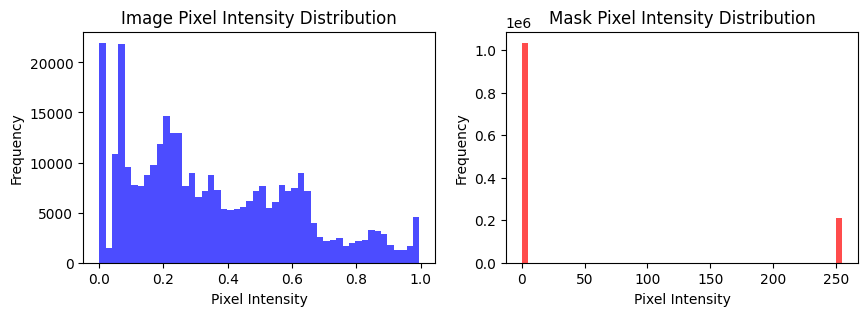

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(image_name, mask_name):
    image_path = os.path.join(images_dir, image_name)
    mask_path = os.path.join(masks_dir, mask_name)

    # Load image and mask
    image = np.array(Image.open(image_path).convert("L")) / 255.0
    mask = np.array(Image.open(mask_path))
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # Image histogram
    axes[0].hist(image.ravel(), bins=50, color='blue', alpha=0.7)
    axes[0].set_title("Image Pixel Intensity Distribution")
    axes[0].set_xlabel("Pixel Intensity")
    axes[0].set_ylabel("Frequency")

    # Mask histogram
    axes[1].hist(mask.ravel(), bins=50, color='red', alpha=0.7)
    axes[1].set_title("Mask Pixel Intensity Distribution")
    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")
    plt.show()

plot_histogram(images_list[0], masks_list[0])


▶ **Find matchine images mask pairs**



In [ ]:
images_dir = '/content/images/images'
masks_dir = '/content/masks/masks'

image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}
mask_files = {os.path.splitext(f)[0] for f in os.listdir(masks_dir) if f.endswith('.png')}

# Find common files
common_files = list(image_files.intersection(mask_files))
print(f"Total match images and masks pairs: {len(common_files)}")

Total match images and masks pairs: 590


▶ **List out sample of images and masks**



Loading image: /content/images/images/ckd4iebll00033b5yts7hmhlg.jpg
Loading image: /content/images/images/ckcxcr149000f3b5y6wr9rg7c.jpg
Loading image: /content/images/images/ckd4h7fq300153b5yhdzs5yar.jpg
Loading image: /content/images/images/ckd03cgbx00133b5yaywin2kz.jpg
Loading image: /content/images/images/ckcx9nmko001u3b5yopeccdvo.jpg
Loading mask: /content/masks/masks/ckd4iebll00033b5yts7hmhlg.png
Loading mask: /content/masks/masks/ckcxcr149000f3b5y6wr9rg7c.png
Loading mask: /content/masks/masks/ckd4h7fq300153b5yhdzs5yar.png
Loading mask: /content/masks/masks/ckd03cgbx00133b5yaywin2kz.png
Loading mask: /content/masks/masks/ckcx9nmko001u3b5yopeccdvo.png


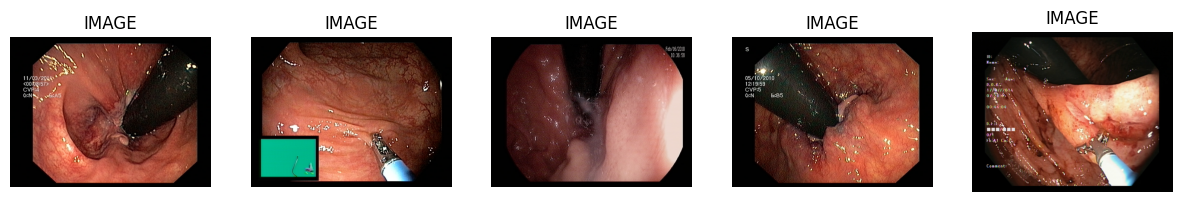

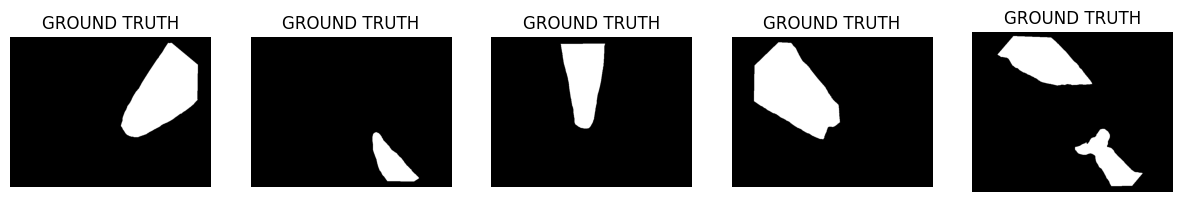

In [ ]:
# Load file names and create a DataFrame with absolute paths
image_files = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir)])
mask_files = sorted([os.path.join(masks_dir, f) for f in os.listdir(masks_dir)])
df = pd.DataFrame({'Image File': image_files, 'Mask File': mask_files})
sample = df.sample(n=5, random_state=42)

# Define functions to display images and masks
def generate_sample_images(sample):
    imgs = sample['Image File']

    _, ax = plt.subplots(1, 5, figsize=(15, 3))
    ax = ax.flatten()

    for i, image_path in enumerate(imgs):
        print(f"Loading image: {image_path}")

        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Could not load image at path {image_path}")
            ax[i].set_title("IMAGE NOT FOUND")
            ax[i].imshow(np.zeros((64, 64, 3), dtype=np.uint8))
            ax[i].axis('off')
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax[i].imshow(image)
        ax[i].set_title("IMAGE")
        ax[i].axis('off')

def generate_sample_masks(sample):
    masks = sample['Mask File']

    _, ax = plt.subplots(1, 5, figsize=(15, 3))
    ax = ax.flatten()

    for i, mask_path in enumerate(masks):
        print(f"Loading mask: {mask_path}")

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"Warning: Could not load mask at path {mask_path}")
            ax[i].set_title("MASK NOT FOUND")
            ax[i].imshow(np.zeros((64, 64), dtype=np.uint8), cmap='gray')
            ax[i].axis('off')
            continue

        ax[i].imshow(mask, cmap='gray')
        ax[i].set_title("GROUND TRUTH")
        ax[i].axis('off')

# Generate and display sample images and masks
generate_sample_images(sample)
generate_sample_masks(sample)


## **1.2) Load train and test file lists :**

---



In [ ]:
with open('/content/train.txt', 'r') as f:
    train_files = f.read().splitlines()
with open('/content/test.txt', 'r') as f:
    test_files = f.read().splitlines()

print(f"Number of training files: {len(train_files)}")
print(f"Number of testing files: {len(test_files)}")
print(f"...........................................")
print(f"Example of testing files: {train_files[:5]}")
print(f"Example of testing files: {test_files[:5]}")

Number of training files: 472
Number of testing files: 118
...........................................
Example of testing files: ['ckcvw5yhd000m3b5yutirmiad', 'ckcvwpanj001b3b5ysxixpcxy', 'ckcuhbkeo000z3b5yq7v1sm0o', 'ckd0afl7u000a3b5y3crqjxla', 'ckcxb6cne000x3b5ynaznq58f']
Example of testing files: ['ckd4ipizn000d3b5yk2vrbyyz', 'ckcxct8oj000k3b5y9iwia72h', 'ckd4ig3d700043b5y0p70afjj', 'ckd03in4g001d3b5yngyc734r', 'ckcx9nmko001u3b5yopeccdvo']


## **1.3) Define image and mask transformations :**

---



In [ ]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256), interpolation=Image.BICUBIC),  # Resize to smaller resolution # Use BICUBIC or NEAREST
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5,0.5,0.5])
])

mask_transform = transforms.Compose([
    transforms.Resize((256, 256), interpolation=Image.NEAREST),  # Resize to smaller resolution
    transforms.ToTensor() # Converts the masks from [0, 255] to [0, 1] by dividing by 255 and converting to a PyTorch tensor.
])

## **1.4) Custom the data :**

---



In [ ]:
class KvasirDataset(Dataset):
    def __init__(self, file_list, img_dir, mask_dir, image_transform=None, mask_transform=None, target_size=(256, 256)):
        self.file_list = file_list
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.image_transform = image_transform  # Use image_transform for images
        self.mask_transform = mask_transform  # Use mask_transform for masks
        self.target_size = target_size

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = self.file_list[idx]
        img_path = os.path.join(self.img_dir, img_name + '.jpg')
        mask_path = os.path.join(self.mask_dir, img_name + '.png')

        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None or mask is None:
            raise ValueError(f"Error loading image or mask for {img_name}")


        image = cv2.resize(image, self.target_size, interpolation=cv2.INTER_AREA)
        mask = cv2.resize(mask, self.target_size, interpolation=cv2.INTER_NEAREST)


        # Convert the image from BGR (OpenCV format) to RGB and from NumPy array to PIL Image
        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        mask = Image.fromarray(mask)

        # Apply the image transformation
        if self.image_transform:
            image = self.image_transform(image)

        # Apply the mask transformation
        if self.mask_transform:
            mask = self.mask_transform(mask)

        return image, mask

##  **1.5) Build training and testing datasets - Create DataLoaders for training and testing :**

In [ ]:
# Create training and testing datasets
train_dataset = KvasirDataset(train_files, images_dir, masks_dir, image_transform=image_transform, mask_transform=mask_transform)
test_dataset = KvasirDataset(test_files, images_dir, masks_dir, image_transform=image_transform, mask_transform=mask_transform)

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4, drop_last=False)

▶ **Verify by printing a sample bath size**

The images and masks are resized to 256x256 before and after transformations, with images having 3 channels (RGB) and masks having 1 channel (grayscale). The batch size is 8, and both images and masks have 4-dimensional tensors: **[batch_size, channels, height, width]**

In [ ]:
# Fetch a random batch from the DataLoader
for images, masks in train_loader:

    # before transformation
    print(f"Resized image size (before transformation): {images.shape}")
    print(f"Resized mask size (before transformation): {masks.shape}")

    # after transformation
    print(f"Image size after transformation: {images.size()}")
    print(f"Mask size after transformation: {masks.size()}")

    break
print('................................................................................')
images, masks = next(iter(train_loader))
print(f"Train batch - Images: {images.shape}, Masks: {masks.shape}")  #  gives the size of each dimension in a tuple form - 8: Batch size (likely 8 images processed at once) - 3: Number of channels (for RGB images - 256x256: Image resolution.
imafes, masks = next(iter(test_loader))
print(f"Train batch = Images: {images.shape}, Masks: {masks.shape}")
print('.................................................................................')
print(f"Image dimension: {np.array(images).ndim}") # the number of dimensions - batch size, channels, height, and widt
print(f"Maak dimension: {np.array(masks).ndim}")

Resized image size (before transformation): torch.Size([8, 3, 256, 256])
Resized mask size (before transformation): torch.Size([8, 1, 256, 256])
Image size after transformation: torch.Size([8, 3, 256, 256])
Mask size after transformation: torch.Size([8, 1, 256, 256])
................................................................................
Train batch - Images: torch.Size([8, 3, 256, 256]), Masks: torch.Size([8, 1, 256, 256])
Train batch = Images: torch.Size([8, 3, 256, 256]), Masks: torch.Size([8, 1, 256, 256])
.................................................................................
Image dimension: 4
Maak dimension: 4


▶ **Print the number of batches in each loader**

In [ ]:
print(f"Number of training batches: {len(train_loader)}") # 472 / 8
print(f"Number of testing batches: {len(test_loader)}") # 118 / 8

Number of training batches: 59
Number of testing batches: 15


▶ **Check if masks in the DataLoader are binary**

In [ ]:
# Check if masks in the DataLoader are binary
for images, masks in train_loader:
    unique_values = torch.unique(masks)
    print("Unique values in a batch of masks:", unique_values)
    if not torch.all((unique_values == 0) | (unique_values == 1)):
        print("Warning: Mask contains values other than 0 and 1.")
    else:
        print("Masks are binary.")
    break  # Check only the first batch


Unique values in a batch of masks: tensor([0., 1.])
Masks are binary.




---


# **2. Define the model architecture with differnt activation function**


---





---


## 🌱 **Model 1: Using ReLU Activation(Rectified Linear Unit):**


---



In [ ]:
import torch
import torch.nn as nn

class UNetRelu(nn.Module):
    def __init__(self):
        super(UNetRelu, self).__init__()

        # Encoder part (contracting path)
        self.enc1 = self.conv_block(3, 64, p=0.3)  # Adding dropout in each block
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = self.conv_block(64, 128, p=0.3)
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = self.conv_block(128, 256, p=0.3)
        self.pool3 = nn.MaxPool2d(2)

        self.enc4 = self.conv_block(256, 512, p=0.3)
        self.pool4 = nn.MaxPool2d(2)

        # Bottleneck (bottom of the U)
        self.bottleneck = self.conv_block(512, 1024, p=0.3)

        # Decoder part (expanding path)
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.conv_block(1024, 512, p=0.3)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256, p=0.3)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128, p=0.3)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64, p=0.3)

        # Final output layer
        self.final = nn.Conv2d(64, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels, p=0.3):
        """Convolutional block with dropout."""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(p),  # Dropout added here with probability p
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(p)  # Dropout added after the second convolution
        )

    def forward(self, x):
        # Encoder
        x1 = self.enc1(x)
        p1 = self.pool1(x1)

        x2 = self.enc2(p1)
        p2 = self.pool2(x2)

        x3 = self.enc3(p2)
        p3 = self.pool3(x3)

        x4 = self.enc4(p3)
        p4 = self.pool4(x4)

        # Bottleneck
        b = self.bottleneck(p4)

        # Decoder with skip connections
        u4 = self.upconv4(b)
        d4 = torch.cat([u4, x4], dim=1)  # Skip connection
        d4 = self.dec4(d4)

        u3 = self.upconv3(d4)
        d3 = torch.cat([u3, x3], dim=1)  # Skip connection
        d3 = self.dec3(d3)

        u2 = self.upconv2(d3)
        d2 = torch.cat([u2, x2], dim=1)  # Skip connection
        d2 = self.dec2(d2)

        u1 = self.upconv1(d2)
        d1 = torch.cat([u1, x1], dim=1)  # Skip connection
        d1 = self.dec1(d1)

        # Final output layer
        out = self.final(d1)
        return torch.sigmoid(out)  # Sigmoid for binary segmentation must remains the same




---


### **a) Define the loss function and optimizer**

---



In [ ]:
# Reinitialize the model and optimizer
import torch.optim.lr_scheduler as lr_scheduler
from torchsummary import summary

model_Relu = UNetRelu()
criterion = nn.BCELoss()

optimizer = optim.Adam(model_Relu.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_Relu.to(device)
images, masks = images.to(device), masks.to(device)
print(device)
# summary(model, input_size=(3, 256, 256)) # input size

cuda




---


### **b) Train the model**

---






*▶* **Calculate Metrics Function accuracy, precision, recall, F1-score, IOU and DSC**

In [ ]:
def calculate_metrics_function(true_mask, predicted_masks, smooth=1e-6):
    true_mask = true_mask.to(predicted_masks.device)
    true_masks_flat = true_mask.view(-1).cpu().numpy()
    predicted_masks_flat = predicted_masks.view(-1).cpu().numpy()

    # True Positives, False Positives, False Negatives
    TruePositive = np.sum((true_masks_flat == 1) & (predicted_masks_flat == 1))
    FalsePositive = np.sum((true_masks_flat == 0) & (predicted_masks_flat == 1))
    FalseNegative = np.sum((true_masks_flat == 1) & (predicted_masks_flat == 0))

    # Accuracy
    total_pixels = true_masks_flat.size
    accuracy = (TruePositive + (total_pixels - TruePositive - FalsePositive - FalseNegative)) / total_pixels

    # Precision, Recall, F1-score, DSC
    precision_score = TruePositive / (TruePositive + FalsePositive) if (TruePositive + FalsePositive) > 0 else 0
    recall_score = TruePositive / (TruePositive + FalseNegative) if (TruePositive + FalseNegative) > 0 else 0
    f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score) if (precision_score + recall_score) > 0 else 0
    dcs_score = (2 * TruePositive + smooth) / (2 * TruePositive + FalsePositive + FalseNegative + smooth)

    # IoU (Intersection over Union)
    union = TruePositive + FalsePositive + FalseNegative
    iou = (TruePositive + smooth) / (union + smooth)

    return accuracy * 100, precision_score, recall_score, f1_score, dcs_score, iou



▶ **Train function**

In [ ]:
def train_model(model_Relu, train_loader, criterion, optimizer, device):
  model_Relu.train()
  train_loss = 0.0
  correct_pixels = 0
  total_pixels = 0
  total_dsc = 0
  total_iou = 0

  for images, masks in train_loader:
      images, masks = images.to(device), masks.to(device)
      optimizer.zero_grad()

      outputs = model_Relu(images)
      loss = criterion(outputs, masks)
      train_loss += loss.item()

      predicted_masks = (torch.sigmoid(outputs) > 0.5).float()


      # calculate training accuracy
      predicted_masks = (outputs > 0.5).float()
      correct_pixels += (predicted_masks == masks).float().sum().item()
      total_pixels += masks.numel()

      # Calculate Dice Coe
      _,_,_,_,dsc, iou = calculate_metrics_function(masks, predicted_masks)
      total_dsc += dsc
      total_iou += iou

      loss.backward()
      optimizer.step()

  avg_train_loss = train_loss / len(train_loader)
  train_accuracy = 100 * correct_pixels / total_pixels
  avg_dsc = total_dsc / len(train_loader)
  avg_iou = total_iou / len(train_loader)

  return avg_train_loss, train_accuracy, avg_dsc, avg_iou



---


### **c) Test the model**

---






In [ ]:
def test_model(model_Relu, test_loader, criterion, device):
  model_Relu.eval()
  test_loss = 0
  all_true_masks = []
  all_predicted_masks = []

  with torch.no_grad():
    for images, masks in test_loader:

      images, masks = images.to(device), masks.to(device)

      # Forward pass function
      outputs = model_Relu(images)
      loss = criterion(outputs, masks)
      test_loss += loss.item()

      # Save true and predicted masks
      all_true_masks.append(masks)
      all_predicted_masks.append((outputs > 0.5).float())

  # Conclude all the results across batches
  all_true_masks = torch.cat(all_true_masks)
  all_predicted_masks = torch.cat(all_predicted_masks)

  # Calculate metrics
  accuracy, precision_score, recall_score, f1_score, dcs_score, iou = calculate_metrics_function(all_true_masks, all_predicted_masks)
  avg_test_loss = test_loss / len(test_loader)

  return avg_test_loss, accuracy, precision_score, recall_score, f1_score, dcs_score, iou

### **d) Print metrics for the current epoch : 30 with early stooping in patience of 5**

In [ ]:
# Reinitialize the model and optimizer
import torch.optim.lr_scheduler as lr_scheduler
from torchsummary import summary

# Initialize W&B
wandb.init(project="final_activation", entity="kandidat18-kristiania-university-college", config={
    "optimizer": "ADAM",
    "scheduler": "CosineAnnealingLR",
    "epochs": 30
})

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_Relu = model_Relu.to(device)
images, masks = images.to(device), masks.to(device)

# Early stopping parameters
patience = 5
best_test_dsc = 0
epochs_no_improve = 0

# Lists to store metrics' results
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
train_dsc_values = []
test_dsc_values = []
train_iou_values = []
test_iou_values = []

epochs_number = 30

# Training loop
for epoch in range(epochs_number):
    print(f"Epoch [{epoch + 1}/{epochs_number}]")

    # Training step
    train_loss, train_accuracy, train_dsc, train_iou = train_model(model_Relu, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    train_dsc_values.append(train_dsc)
    train_iou_values.append(train_iou)

    # Testing step
    test_loss, test_accuracy, precision_score, recall_score, f1_score, test_dsc, test_iou = test_model(model_Relu, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    test_dsc_values.append(test_dsc)
    test_iou_values.append(test_iou)

    # Log both training and testing metrics to WandB
    wandb.log({
        "Epoch": epoch + 1,
        "Train Loss": train_loss,
        "Train Accuracy": train_accuracy,
        "Train DSC": train_dsc,
        "Train IoU": train_iou,
        "Test Loss": test_loss,
        "Test Accuracy": test_accuracy,
        "Test Precision": precision_score,
        "Test Recall": recall_score,
        "Test F1-Score": f1_score,
        "Test DSC": test_dsc,
        "Test IoU": test_iou
    })

    # Print metrics
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Train DSC: {train_dsc:.4f}, Train IoU: {train_iou:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, "
          f"Test Precision: {precision_score:.4f}, Test Recall: {recall_score:.4f}, "
          f"Test F1-Score: {f1_score:.4f}, Test DSC: {test_dsc:.4f}, Test IoU: {test_iou:.4f}\n")

    # Step the scheduler based on test loss
    scheduler.step(test_loss)

    # Early stopping check on Test DSC
    if test_dsc > best_test_dsc:
        best_test_dsc = test_dsc
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if early stopping condition is met
    if epochs_no_improve >= patience:
        print("Early stopping break!")
        break

# Finish the WandB run
wandb.finish()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: deeplearningpytorch (kandidat18-kristiania-university-college). Use `wandb login --relogin` to force relogin


Epoch [1/30]


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Loss: 0.2948, Train Accuracy: 89.95%, Train DSC: 0.0000, Train IoU: 0.0000
Test Loss: 0.1901, Test Accuracy: 90.68%, Test Precision: 0.0000, Test Recall: 0.0000, Test F1-Score: 0.0000, Test DSC: 0.0000, Test IoU: 0.0000

Epoch [2/30]


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Loss: 0.1980, Train Accuracy: 91.22%, Train DSC: 0.2472, Train IoU: 0.1754
Test Loss: 0.1393, Test Accuracy: 95.02%, Test Precision: 0.8079, Test Recall: 0.6115, Test F1-Score: 0.6961, Test DSC: 0.6961, Test IoU: 0.5339

Epoch [3/30]
Train Loss: 0.1695, Train Accuracy: 93.33%, Train DSC: 0.5979, Train IoU: 0.4361
Test Loss: 0.1255, Test Accuracy: 95.26%, Test Precision: 0.8209, Test Recall: 0.6287, Test F1-Score: 0.7121, Test DSC: 0.7121, Test IoU: 0.5529

Epoch [4/30]
Train Loss: 0.1688, Train Accuracy: 93.77%, Train DSC: 0.6259, Train IoU: 0.4650
Test Loss: 0.1249, Test Accuracy: 95.45%, Test Precision: 0.8309, Test Recall: 0.6428, Test F1-Score: 0.7249, Test DSC: 0.7249, Test IoU: 0.5685

Epoch [5/30]
Train Loss: 0.1596, Train Accuracy: 93.83%, Train DSC: 0.6592, Train IoU: 0.4996
Test Loss: 0.1325, Test Accuracy: 95.15%, Test Precision: 0.7467, Test Recall: 0.7256, Test F1-Score: 0.7360, Test DSC: 0.7360, Test IoU: 0.5822

Epoch [6/30]
Train Loss: 0.1556, Train Accuracy: 93.9

### **e) Compare Original Image and Ground Truth Mask with Predicted Mask**

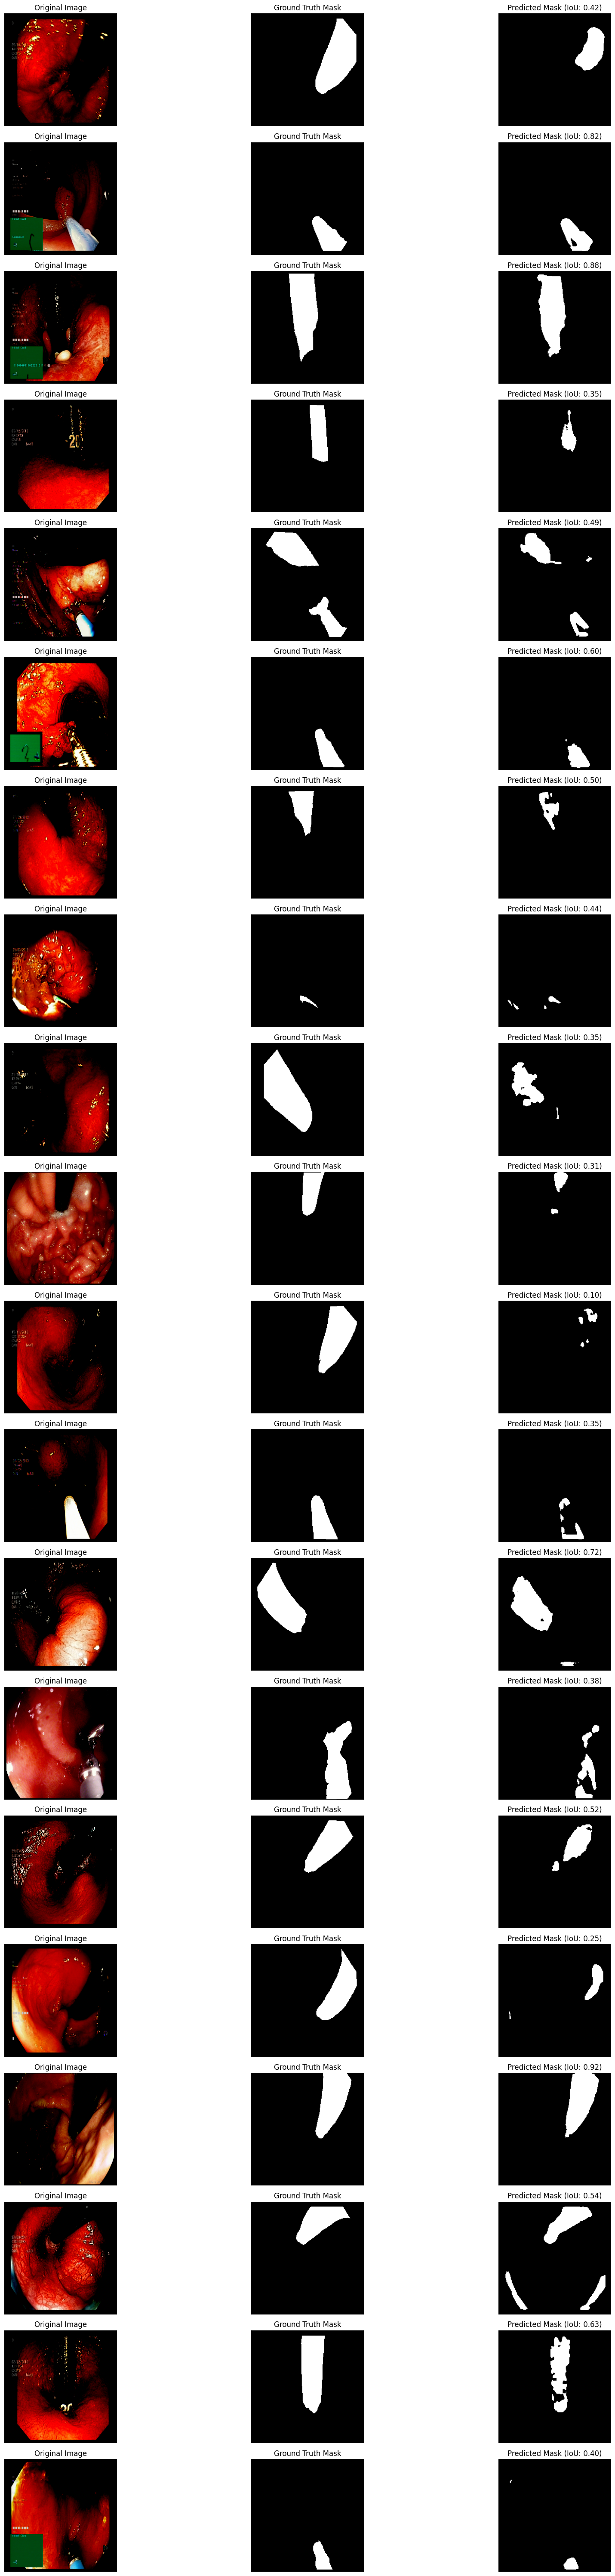

Image 1 IoU: 0.42
Image 2 IoU: 0.82
Image 3 IoU: 0.88
Image 4 IoU: 0.35
Image 5 IoU: 0.49
Image 6 IoU: 0.60
Image 7 IoU: 0.50
Image 8 IoU: 0.44
Image 9 IoU: 0.35
Image 10 IoU: 0.31
Image 11 IoU: 0.10
Image 12 IoU: 0.35
Image 13 IoU: 0.72
Image 14 IoU: 0.38
Image 15 IoU: 0.52
Image 16 IoU: 0.25
Image 17 IoU: 0.92
Image 18 IoU: 0.54
Image 19 IoU: 0.63
Image 20 IoU: 0.40


In [ ]:
def display_predictions(images, true_masks, predicted_masks, ious, num_images=20):
    plt.figure(figsize=(20, num_images * 3))

    for i in range(num_images):
        # Original Image
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[i].cpu().numpy().transpose(1, 2, 0))  # From (C, H, W) to (H, W, C)
        plt.title("Original Image")
        plt.axis('off')

        # Ground Truth Mask
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(true_masks[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title("Ground Truth Mask")
        plt.axis('off')

        # Predicted Mask
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(predicted_masks[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title(f"Predicted Mask (IoU: {ious[i]:.2f})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Function to calculate IoU for each image
def calculate_iou_per_image(true_masks, predicted_masks, threshold=0.5):
    ious = []
    batch_size = true_masks.size(0)

    for i in range(batch_size):
        pred_mask = (predicted_masks[i] > threshold).float()
        true_mask = true_masks[i].float()

        # Calculate Intersection and Union
        intersection = (pred_mask * true_mask).sum()
        union = pred_mask.sum() + true_mask.sum() - intersection

        if union == 0:
            iou = 0.0
        else:
            iou = intersection / union  # IoU formula

        ious.append(iou.item())

    return ious

# Collect images from multiple batches
collected_images = []
collected_masks = []
collected_pred_masks = []
collected_ious = []

num_images_needed = 20
collected_so_far = 0

# Iterate over the test_loader to collect images until we have enough
for images, masks in test_loader:
    images, masks = images.to(device), masks.to(device)

    # Set model to evaluation mode and predict masks
    model_Relu.eval()
    with torch.no_grad():
        predicted_masks = model_Relu(images)
        predicted_masks = (predicted_masks > 0.53).float()

    # Calculate IoU for each image
    ious = calculate_iou_per_image(masks, predicted_masks)

    # Append to the collected lists
    collected_images.extend(images.cpu())
    collected_masks.extend(masks.cpu())
    collected_pred_masks.extend(predicted_masks.cpu())
    collected_ious.extend(ious)

    collected_so_far += len(images)

    if collected_so_far >= num_images_needed:
        break

# Convert collected data to tensors
collected_images = torch.stack(collected_images)[:num_images_needed]
collected_masks = torch.stack(collected_masks)[:num_images_needed]
collected_pred_masks = torch.stack(collected_pred_masks)[:num_images_needed]
collected_ious = collected_ious[:num_images_needed]

# Show the predictions, ground truth, original images, and IoUs
display_predictions(collected_images, collected_masks, collected_pred_masks, collected_ious, num_images=num_images_needed)

# Show IoU accuracy % for each image
for idx, iou in enumerate(collected_ious):
    print(f"Image {idx + 1} IoU: {iou:.2f}")




---


## 🌱 **Model 2: Using Tanh Activation:**

---



In [ ]:
import torch
import torch.nn as nn

class UNetTanh(nn.Module):
    def __init__(self):
        super(UNetTanh, self).__init__()

        # Encoder part (contracting path)
        self.enc1 = self.conv_block(3, 64, p=0.3)  # Adding dropout in each block
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = self.conv_block(64, 128, p=0.3)
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = self.conv_block(128, 256, p=0.3)
        self.pool3 = nn.MaxPool2d(2)

        self.enc4 = self.conv_block(256, 512, p=0.3)
        self.pool4 = nn.MaxPool2d(2)

        # Bottleneck (bottom of the U)
        self.bottleneck = self.conv_block(512, 1024, p=0.3)

        # Decoder part (expanding path)
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.conv_block(1024, 512, p=0.3)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256, p=0.3)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128, p=0.3)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64, p=0.3)

        # Final output layer
        self.final = nn.Conv2d(64, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels, p=0.3):
        """Convolutional block with dropout."""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.Dropout(p),  # Dropout added here with probability p
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.Dropout(p)  # Dropout added after the second convolution
        )

    def forward(self, x):
        # Encoder
        x1 = self.enc1(x)
        p1 = self.pool1(x1)

        x2 = self.enc2(p1)
        p2 = self.pool2(x2)

        x3 = self.enc3(p2)
        p3 = self.pool3(x3)

        x4 = self.enc4(p3)
        p4 = self.pool4(x4)

        # Bottleneck
        b = self.bottleneck(p4)

        # Decoder with skip connections
        u4 = self.upconv4(b)
        d4 = torch.cat([u4, x4], dim=1)  # Skip connection
        d4 = self.dec4(d4)

        u3 = self.upconv3(d4)
        d3 = torch.cat([u3, x3], dim=1)  # Skip connection
        d3 = self.dec3(d3)

        u2 = self.upconv2(d3)
        d2 = torch.cat([u2, x2], dim=1)  # Skip connection
        d2 = self.dec2(d2)

        u1 = self.upconv1(d2)
        d1 = torch.cat([u1, x1], dim=1)  # Skip connection
        d1 = self.dec1(d1)

        # Final output layer
        out = self.final(d1)
        return torch.sigmoid(out)  # Sigmoid for binary segmentation must remains the same




---


### **a) Define the loss function and optimizer**

---



In [ ]:
# Reinitialize the model and optimizer
import torch.optim.lr_scheduler as lr_scheduler
from torchsummary import summary

 # Reinitialize the model and optimizer
import torch.optim.lr_scheduler as lr_scheduler
from torchsummary import summary

model_Tanh = UNetTanh()
criterion = nn.BCELoss()

optimizer = optim.Adam(model_Tanh.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_Tanh.to(device)
images, masks = images.to(device), masks.to(device)
print(device)
# summary(model, input_size=(3, 256, 256)) # input size()
criterion = nn.BCELoss()



cuda




---


### **b) Train the model**

---






In [ ]:
def calculate_metrics_function(true_mask, predicted_masks, smooth=1e-6):
    true_mask = true_mask.to(predicted_masks.device)
    true_masks_flat = true_mask.view(-1).cpu().numpy()
    predicted_masks_flat = predicted_masks.view(-1).cpu().numpy()

    # True Positives, False Positives, False Negatives
    TruePositive = np.sum((true_masks_flat == 1) & (predicted_masks_flat == 1))
    FalsePositive = np.sum((true_masks_flat == 0) & (predicted_masks_flat == 1))
    FalseNegative = np.sum((true_masks_flat == 1) & (predicted_masks_flat == 0))

    # Accuracy
    total_pixels = true_masks_flat.size
    accuracy = (TruePositive + (total_pixels - TruePositive - FalsePositive - FalseNegative)) / total_pixels

    # Precision, Recall, F1-score, DSC
    precision_score = TruePositive / (TruePositive + FalsePositive) if (TruePositive + FalsePositive) > 0 else 0
    recall_score = TruePositive / (TruePositive + FalseNegative) if (TruePositive + FalseNegative) > 0 else 0
    f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score) if (precision_score + recall_score) > 0 else 0
    dcs_score = (2 * TruePositive + smooth) / (2 * TruePositive + FalsePositive + FalseNegative + smooth)

    # IoU (Intersection over Union)
    union = TruePositive + FalsePositive + FalseNegative
    iou = (TruePositive + smooth) / (union + smooth)

    return accuracy * 100, precision_score, recall_score, f1_score, dcs_score, iou



In [ ]:
def train_model(model_Tanh, train_loader, criterion, optimizer, device):
  model_Tanh.train()
  train_loss = 0.0
  correct_pixels = 0
  total_pixels = 0
  total_dsc = 0
  total_iou = 0

  for images, masks in train_loader:
      images, masks = images.to(device), masks.to(device)
      optimizer.zero_grad()

      outputs = model_Tanh(images)
      loss = criterion(outputs, masks)
      train_loss += loss.item()

      predicted_masks = (torch.sigmoid(outputs) > 0.5).float()


      # calculate training accuracy
      predicted_masks = (outputs > 0.5).float()
      correct_pixels += (predicted_masks == masks).float().sum().item()
      total_pixels += masks.numel()

      # Calculate Dice Coe
      _,_,_,_,dsc, iou = calculate_metrics_function(masks, predicted_masks)
      total_dsc += dsc
      total_iou += iou

      loss.backward()
      optimizer.step()

  avg_train_loss = train_loss / len(train_loader)
  train_accuracy = 100 * correct_pixels / total_pixels
  avg_dsc = total_dsc / len(train_loader)
  avg_iou = total_iou / len(train_loader)

  return avg_train_loss, train_accuracy, avg_dsc, avg_iou



---


### **c) Test the model**

---






In [ ]:
def test_model(model_Tanh, test_loader, criterion, device):
  model_Tanh.eval()
  test_loss = 0
  all_true_masks = []
  all_predicted_masks = []

  with torch.no_grad():
    for images, masks in test_loader:

      images, masks = images.to(device), masks.to(device)

      # Forward pass function
      outputs = model_Tanh(images)
      loss = criterion(outputs, masks)
      test_loss += loss.item()

      # Save true and predicted masks
      all_true_masks.append(masks)
      all_predicted_masks.append((outputs > 0.5).float())

  # Conclude all the results across batches
  all_true_masks = torch.cat(all_true_masks)
  all_predicted_masks = torch.cat(all_predicted_masks)

  # Calculate metrics
  accuracy, precision_score, recall_score, f1_score, dcs_score, iou = calculate_metrics_function(all_true_masks, all_predicted_masks)
  avg_test_loss = test_loss / len(test_loader)

  return avg_test_loss, accuracy, precision_score, recall_score, f1_score, dcs_score, iou

### **d) Print metrics for the current epoch : 30 with early stooping in patience of 5**

In [ ]:
# Reinitialize the model and optimizer
import torch.optim.lr_scheduler as lr_scheduler
from torchsummary import summary

# Initialize W&B
wandb.init(project="final_activation", entity="kandidat18-kristiania-university-college", config={
    "optimizer": "ADAM",
    "learning_rate": 0.001,
    "scheduler": "CosineAnnealingLR",
    "epochs": 30
})

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_Tanh = model_Tanh.to(device)
images, masks = images.to(device), masks.to(device)

# Early stopping parameters
patience = 5
best_test_dsc = 0
epochs_no_improve = 0

# Lists to store metrics' results
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
train_dsc_values = []
test_dsc_values = []
train_iou_values = []
test_iou_values = []

epochs_number = 30

# Training loop
for epoch in range(epochs_number):
    print(f"Epoch [{epoch + 1}/{epochs_number}]")

    # Training step
    train_loss, train_accuracy, train_dsc, train_iou = train_model(model_Tanh, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    train_dsc_values.append(train_dsc)
    train_iou_values.append(train_iou)

    # Testing step
    test_loss, test_accuracy, precision_score, recall_score, f1_score, test_dsc, test_iou = test_model(model_Tanh, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    test_dsc_values.append(test_dsc)
    test_iou_values.append(test_iou)

    # Log both training and testing metrics to WandB
    wandb.log({
        "Epoch": epoch + 1,
        "Train Loss": train_loss,
        "Train Accuracy": train_accuracy,
        "Train DSC": train_dsc,
        "Train IoU": train_iou,
        "Test Loss": test_loss,
        "Test Accuracy": test_accuracy,
        "Test Precision": precision_score,
        "Test Recall": recall_score,
        "Test F1-Score": f1_score,
        "Test DSC": test_dsc,
        "Test IoU": test_iou
    })

    # Print metrics
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Train DSC: {train_dsc:.4f}, Train IoU: {train_iou:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, "
          f"Test Precision: {precision_score:.4f}, Test Recall: {recall_score:.4f}, "
          f"Test F1-Score: {f1_score:.4f}, Test DSC: {test_dsc:.4f}, Test IoU: {test_iou:.4f}\n")

    # Step the scheduler based on test loss
    scheduler.step(test_loss)

    # Early stopping check on Test DSC
    if test_dsc > best_test_dsc:
        best_test_dsc = test_dsc
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if early stopping condition is met
    if epochs_no_improve >= patience:
        print("Early stopping break!")
        break

# Finish the WandB run
wandb.finish()


Epoch [1/30]
Train Loss: 0.3365, Train Accuracy: 88.62%, Train DSC: 0.0466, Train IoU: 0.0257
Test Loss: 0.2845, Test Accuracy: 90.58%, Test Precision: 0.4749, Test Recall: 0.1033, Test F1-Score: 0.1697, Test DSC: 0.1697, Test IoU: 0.0927

Epoch [2/30]
Train Loss: 0.2772, Train Accuracy: 89.88%, Train DSC: 0.0529, Train IoU: 0.0284
Test Loss: 0.5910, Test Accuracy: 73.14%, Test Precision: 0.0240, Test Recall: 0.0475, Test F1-Score: 0.0319, Test DSC: 0.0319, Test IoU: 0.0162

Epoch [3/30]
Train Loss: 0.2325, Train Accuracy: 90.58%, Train DSC: 0.2835, Train IoU: 0.1782
Test Loss: 0.2987, Test Accuracy: 90.39%, Test Precision: 0.4292, Test Recall: 0.0953, Test F1-Score: 0.1560, Test DSC: 0.1560, Test IoU: 0.0846

Epoch [4/30]
Train Loss: 0.2356, Train Accuracy: 91.37%, Train DSC: 0.3612, Train IoU: 0.2373
Test Loss: 0.1973, Test Accuracy: 93.61%, Test Precision: 0.6765, Test Recall: 0.6035, Test F1-Score: 0.6379, Test DSC: 0.6379, Test IoU: 0.4683

Epoch [5/30]
Train Loss: 0.1870, Train A

### **e) Compare Original Image and Ground Truth Mask with Predicted Mask**

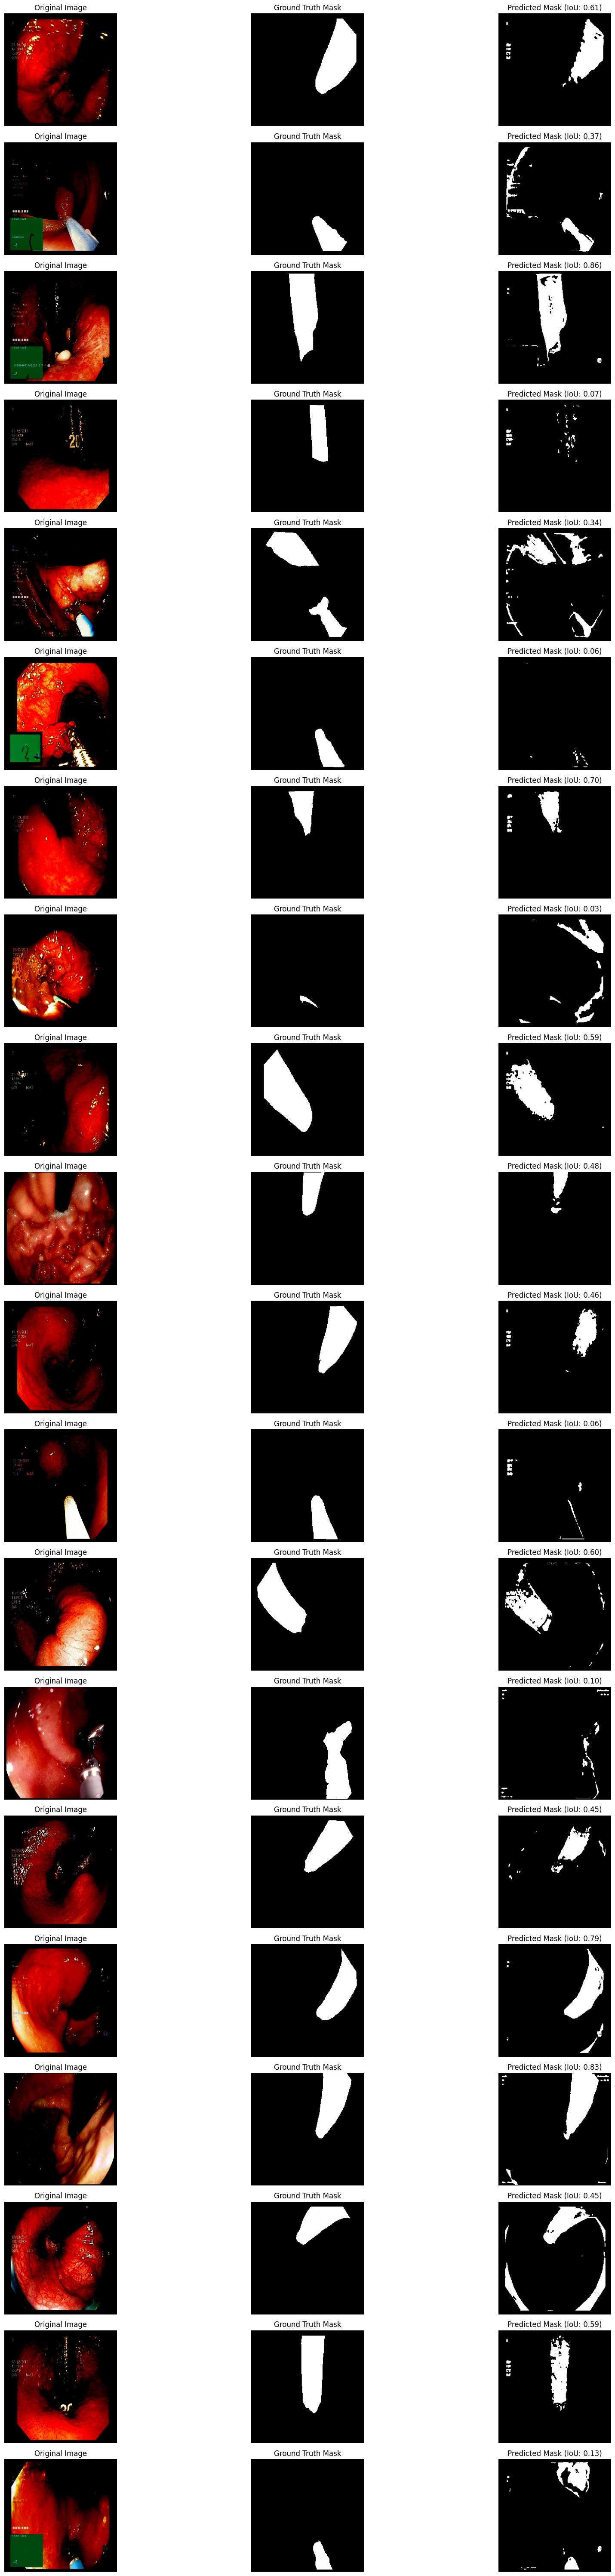

Image 1 IoU: 0.61
Image 2 IoU: 0.37
Image 3 IoU: 0.86
Image 4 IoU: 0.07
Image 5 IoU: 0.34
Image 6 IoU: 0.06
Image 7 IoU: 0.70
Image 8 IoU: 0.03
Image 9 IoU: 0.59
Image 10 IoU: 0.48
Image 11 IoU: 0.46
Image 12 IoU: 0.06
Image 13 IoU: 0.60
Image 14 IoU: 0.10
Image 15 IoU: 0.45
Image 16 IoU: 0.79
Image 17 IoU: 0.83
Image 18 IoU: 0.45
Image 19 IoU: 0.59
Image 20 IoU: 0.13


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch


def display_predictions(images, true_masks, predicted_masks, ious, num_images=20):
    plt.figure(figsize=(20, num_images * 3))

    for i in range(num_images):
        # Original Image
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[i].cpu().numpy().transpose(1, 2, 0))  # From (C, H, W) to (H, W, C)
        plt.title("Original Image")
        plt.axis('off')

        # Ground Truth Mask
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(true_masks[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title("Ground Truth Mask")
        plt.axis('off')

        # Predicted Mask
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(predicted_masks[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title(f"Predicted Mask (IoU: {ious[i]:.2f})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Function to calculate IoU for each image
def calculate_iou_per_image(true_masks, predicted_masks, threshold=0.5):
    ious = []
    batch_size = true_masks.size(0)

    for i in range(batch_size):
        pred_mask = (predicted_masks[i] > threshold).float()
        true_mask = true_masks[i].float()

        # Calculate Intersection and Union
        intersection = (pred_mask * true_mask).sum()
        union = pred_mask.sum() + true_mask.sum() - intersection

        if union == 0:
            iou = 0.0
        else:
            iou = intersection / union  # IoU formula

        ious.append(iou.item())

    return ious

# Collect images from multiple batches
collected_images = []
collected_masks = []
collected_pred_masks = []
collected_ious = []

num_images_needed = 20
collected_so_far = 0

# Iterate over the test_loader to collect images until we have enough
for images, masks in test_loader:
    images, masks = images.to(device), masks.to(device)

    # Set model to evaluation mode and predict masks
    model_Tanh.eval()
    with torch.no_grad():
        predicted_masks = model_Tanh(images)
        predicted_masks = (predicted_masks > 0.56).float()

    # Calculate IoU for each image
    ious = calculate_iou_per_image(masks, predicted_masks)

    # Append to the collected lists
    collected_images.extend(images.cpu())
    collected_masks.extend(masks.cpu())
    collected_pred_masks.extend(predicted_masks.cpu())
    collected_ious.extend(ious)

    collected_so_far += len(images)

    if collected_so_far >= num_images_needed:
        break

# Convert collected data to tensors
collected_images = torch.stack(collected_images)[:num_images_needed]
collected_masks = torch.stack(collected_masks)[:num_images_needed]
collected_pred_masks = torch.stack(collected_pred_masks)[:num_images_needed]
collected_ious = collected_ious[:num_images_needed]

# Show the predictions, ground truth, original images, and IoUs
display_predictions(collected_images, collected_masks, collected_pred_masks, collected_ious, num_images=num_images_needed)

# Show IoU accuracy % for each image
for idx, iou in enumerate(collected_ious):
    print(f"Image {idx + 1} IoU: {iou:.2f}")


## 🌱 **Model 3: Using LeakyReLU Activation:**

In [ ]:
import torch
import torch.nn as nn

class UNetLeakyReLU(nn.Module):
    def __init__(self):
        super(UNetLeakyReLU, self).__init__()

        # Encoder part (contracting path)
        self.enc1 = self.conv_block(3, 64, p=0.3)  # Adding dropout in each block
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = self.conv_block(64, 128, p=0.3)
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = self.conv_block(128, 256, p=0.3)
        self.pool3 = nn.MaxPool2d(2)

        self.enc4 = self.conv_block(256, 512, p=0.3)
        self.pool4 = nn.MaxPool2d(2)

        # Bottleneck (bottom of the U)
        self.bottleneck = self.conv_block(512, 1024, p=0.3)

        # Decoder part (expanding path)
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.conv_block(1024, 512, p=0.3)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256, p=0.3)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128, p=0.3)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64, p=0.3)

        # Final output layer
        self.final = nn.Conv2d(64, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels, p=0.3):
        """Convolutional block with dropout."""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.Dropout(p),  # Dropout added here with probability p
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.Dropout(p)  # Dropout added after the second convolution
        )

    def forward(self, x):
        # Encoder
        x1 = self.enc1(x)
        p1 = self.pool1(x1)

        x2 = self.enc2(p1)
        p2 = self.pool2(x2)

        x3 = self.enc3(p2)
        p3 = self.pool3(x3)

        x4 = self.enc4(p3)
        p4 = self.pool4(x4)

        # Bottleneck
        b = self.bottleneck(p4)

        # Decoder with skip connections
        u4 = self.upconv4(b)
        d4 = torch.cat([u4, x4], dim=1)  # Skip connection
        d4 = self.dec4(d4)

        u3 = self.upconv3(d4)
        d3 = torch.cat([u3, x3], dim=1)  # Skip connection
        d3 = self.dec3(d3)

        u2 = self.upconv2(d3)
        d2 = torch.cat([u2, x2], dim=1)  # Skip connection
        d2 = self.dec2(d2)

        u1 = self.upconv1(d2)
        d1 = torch.cat([u1, x1], dim=1)  # Skip connection
        d1 = self.dec1(d1)

        # Final output layer
        out = self.final(d1)
        return torch.sigmoid(out)  # Sigmoid for binary segmentation must remains the same




---


### **a) Define the loss function and optimizer**

---



In [ ]:
# Reinitialize the model and optimizer
model_UNetLeakyReLU = UNetLeakyReLU()

# Define loss function
criterion = nn.BCELoss()

optimizer = optim.Adam(model_UNetLeakyReLU.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# Move model and data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_UNetLeakyReLU.to(device)
images, masks = images.to(device), masks.to(device)

print(device)
# summary(model, input_size=(3, 256, 256)) # input size

cuda




---


### **b) Train the model**

---






In [ ]:
def calculate_metrics_function(true_mask, predicted_masks, smooth=1e-6):
    true_mask = true_mask.to(predicted_masks.device)
    true_masks_flat = true_mask.view(-1).cpu().numpy()
    predicted_masks_flat = predicted_masks.view(-1).cpu().numpy()

    # True Positives, False Positives, False Negatives
    TruePositive = np.sum((true_masks_flat == 1) & (predicted_masks_flat == 1))
    FalsePositive = np.sum((true_masks_flat == 0) & (predicted_masks_flat == 1))
    FalseNegative = np.sum((true_masks_flat == 1) & (predicted_masks_flat == 0))

    # Accuracy
    total_pixels = true_masks_flat.size
    accuracy = (TruePositive + (total_pixels - TruePositive - FalsePositive - FalseNegative)) / total_pixels

    # Precision, Recall, F1-score, DSC
    precision_score = TruePositive / (TruePositive + FalsePositive) if (TruePositive + FalsePositive) > 0 else 0
    recall_score = TruePositive / (TruePositive + FalseNegative) if (TruePositive + FalseNegative) > 0 else 0
    f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score) if (precision_score + recall_score) > 0 else 0
    dcs_score = (2 * TruePositive + smooth) / (2 * TruePositive + FalsePositive + FalseNegative + smooth)

    # IoU (Intersection over Union)
    union = TruePositive + FalsePositive + FalseNegative
    iou = (TruePositive + smooth) / (union + smooth)

    return accuracy * 100, precision_score, recall_score, f1_score, dcs_score, iou





---


### **c) Test the model**

---






In [ ]:
def train_model(model_UNetLeakyReLU, train_loader, criterion, optimizer, device):
  model_UNetLeakyReLU.train()
  train_loss = 0.0
  correct_pixels = 0
  total_pixels = 0
  total_dsc = 0
  total_iou = 0

  for images, masks in train_loader:
      images, masks = images.to(device), masks.to(device)
      optimizer.zero_grad()

      outputs = model_UNetLeakyReLU(images)
      loss = criterion(outputs, masks)
      train_loss += loss.item()

      predicted_masks = (torch.sigmoid(outputs) > 0.5).float()


      # calculate training accuracy
      predicted_masks = (outputs > 0.5).float()
      correct_pixels += (predicted_masks == masks).float().sum().item()
      total_pixels += masks.numel()

      # Calculate Dice Coe
      _,_,_,_,dsc, iou = calculate_metrics_function(masks, predicted_masks)
      total_dsc += dsc
      total_iou += iou

      loss.backward()
      optimizer.step()

  avg_train_loss = train_loss / len(train_loader)
  train_accuracy = 100 * correct_pixels / total_pixels
  avg_dsc = total_dsc / len(train_loader)
  avg_iou = total_iou / len(train_loader)

  return avg_train_loss, train_accuracy, avg_dsc, avg_iou

In [ ]:
def test_model(model_UNetLeakyReLU, test_loader, criterion, device):
  model_UNetLeakyReLU.eval()
  test_loss = 0
  all_true_masks = []
  all_predicted_masks = []

  with torch.no_grad():
    for images, masks in test_loader:

      images, masks = images.to(device), masks.to(device)

      # Forward pass function
      outputs = model_UNetLeakyReLU(images)
      loss = criterion(outputs, masks)
      test_loss += loss.item()

      # Save true and predicted masks
      all_true_masks.append(masks)
      all_predicted_masks.append((outputs > 0.5).float())

  # Conclude all the results across batches
  all_true_masks = torch.cat(all_true_masks)
  all_predicted_masks = torch.cat(all_predicted_masks)

  # Calculate metrics
  accuracy, precision_score, recall_score, f1_score, dcs_score, iou = calculate_metrics_function(all_true_masks, all_predicted_masks)
  avg_test_loss = test_loss / len(test_loader)

  return avg_test_loss, accuracy, precision_score, recall_score, f1_score, dcs_score, iou

### **d) Print metrics for the current epoch : 30 with early stooping in patience of 5**

In [ ]:
# Reinitialize the model and optimizer
import torch.optim.lr_scheduler as lr_scheduler
from torchsummary import summary

model_UNetLeakyReLU = UNetLeakyReLU()
criterion = nn.BCELoss()

optimizer = optim.Adam(model_UNetLeakyReLU.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_UNetLeakyReLU = model_UNetLeakyReLU.to(device)
images, masks = images.to(device), masks.to(device)
print(device)


# Initialize W&B
wandb.init(project="final_activation", entity="kandidat18-kristiania-university-college", config={
    "optimizer": "ADAM",
    "learning_rate": 0.001,
    "scheduler": "CosineAnnealingLR",
    "epochs": 30
})


# Early stopping parameters
patience = 5
best_test_dsc = 0
epochs_no_improve = 0

# Lists to store metrics' results
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
train_dsc_values = []
test_dsc_values = []
train_iou_values = []
test_iou_values = []

epochs_number = 30

# Training loop
for epoch in range(epochs_number):
    print(f"Epoch [{epoch + 1}/{epochs_number}]")

    # Training step
    train_loss, train_accuracy, train_dsc, train_iou = train_model(model_UNetLeakyReLU, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    train_dsc_values.append(train_dsc)
    train_iou_values.append(train_iou)

    # Testing step
    test_loss, test_accuracy, precision_score, recall_score, f1_score, test_dsc, test_iou = test_model(model_UNetLeakyReLU, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    test_dsc_values.append(test_dsc)
    test_iou_values.append(test_iou)

    # Log both training and testing metrics to WandB
    wandb.log({
        "Epoch": epoch + 1,
        "Train Loss": train_loss,
        "Train Accuracy": train_accuracy,
        "Train DSC": train_dsc,
        "Train IoU": train_iou,
        "Test Loss": test_loss,
        "Test Accuracy": test_accuracy,
        "Test Precision": precision_score,
        "Test Recall": recall_score,
        "Test F1-Score": f1_score,
        "Test DSC": test_dsc,
        "Test IoU": test_iou
    })

    # Print metrics
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Train DSC: {train_dsc:.4f}, Train IoU: {train_iou:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, "
          f"Test Precision: {precision_score:.4f}, Test Recall: {recall_score:.4f}, "
          f"Test F1-Score: {f1_score:.4f}, Test DSC: {test_dsc:.4f}, Test IoU: {test_iou:.4f}\n")

    # Step the scheduler based on test loss
    scheduler.step(test_loss)

    # Early stopping check on Test DSC
    if test_dsc > best_test_dsc:
        best_test_dsc = test_dsc
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if early stopping condition is met
    if epochs_no_improve >= patience:
        print("Early stopping break!")
        break

# Finish the WandB run
wandb.finish()


cuda


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: deeplearningpytorch (kandidat18-kristiania-university-college). Use `wandb login --relogin` to force relogin


Epoch [1/30]
Train Loss: 0.2790, Train Accuracy: 90.07%, Train DSC: 0.0510, Train IoU: 0.0311
Test Loss: 0.1827, Test Accuracy: 92.53%, Test Precision: 0.8763, Test Recall: 0.2312, Test F1-Score: 0.3659, Test DSC: 0.3659, Test IoU: 0.2239

Epoch [2/30]


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Loss: 0.2019, Train Accuracy: 92.28%, Train DSC: 0.4547, Train IoU: 0.3079
Test Loss: 0.1455, Test Accuracy: 94.35%, Test Precision: 0.9170, Test Recall: 0.4327, Test F1-Score: 0.5879, Test DSC: 0.5879, Test IoU: 0.4164

Epoch [3/30]
Train Loss: 0.1859, Train Accuracy: 92.85%, Train DSC: 0.5157, Train IoU: 0.3633
Test Loss: 0.1219, Test Accuracy: 95.24%, Test Precision: 0.8206, Test Recall: 0.6259, Test F1-Score: 0.7102, Test DSC: 0.7102, Test IoU: 0.5506

Epoch [4/30]
Train Loss: 0.1823, Train Accuracy: 93.09%, Train DSC: 0.5436, Train IoU: 0.3888
Test Loss: 0.1332, Test Accuracy: 94.94%, Test Precision: 0.9154, Test Recall: 0.5032, Test F1-Score: 0.6494, Test DSC: 0.6494, Test IoU: 0.4809

Epoch [5/30]
Train Loss: 0.1638, Train Accuracy: 93.70%, Train DSC: 0.6201, Train IoU: 0.4608
Test Loss: 0.1261, Test Accuracy: 95.57%, Test Precision: 0.8251, Test Recall: 0.6658, Test F1-Score: 0.7370, Test DSC: 0.7370, Test IoU: 0.5835

Epoch [6/30]
Train Loss: 0.1571, Train Accuracy: 93.6

### **e) Compare Original Image and Ground Truth Mask with Predicted Mask**

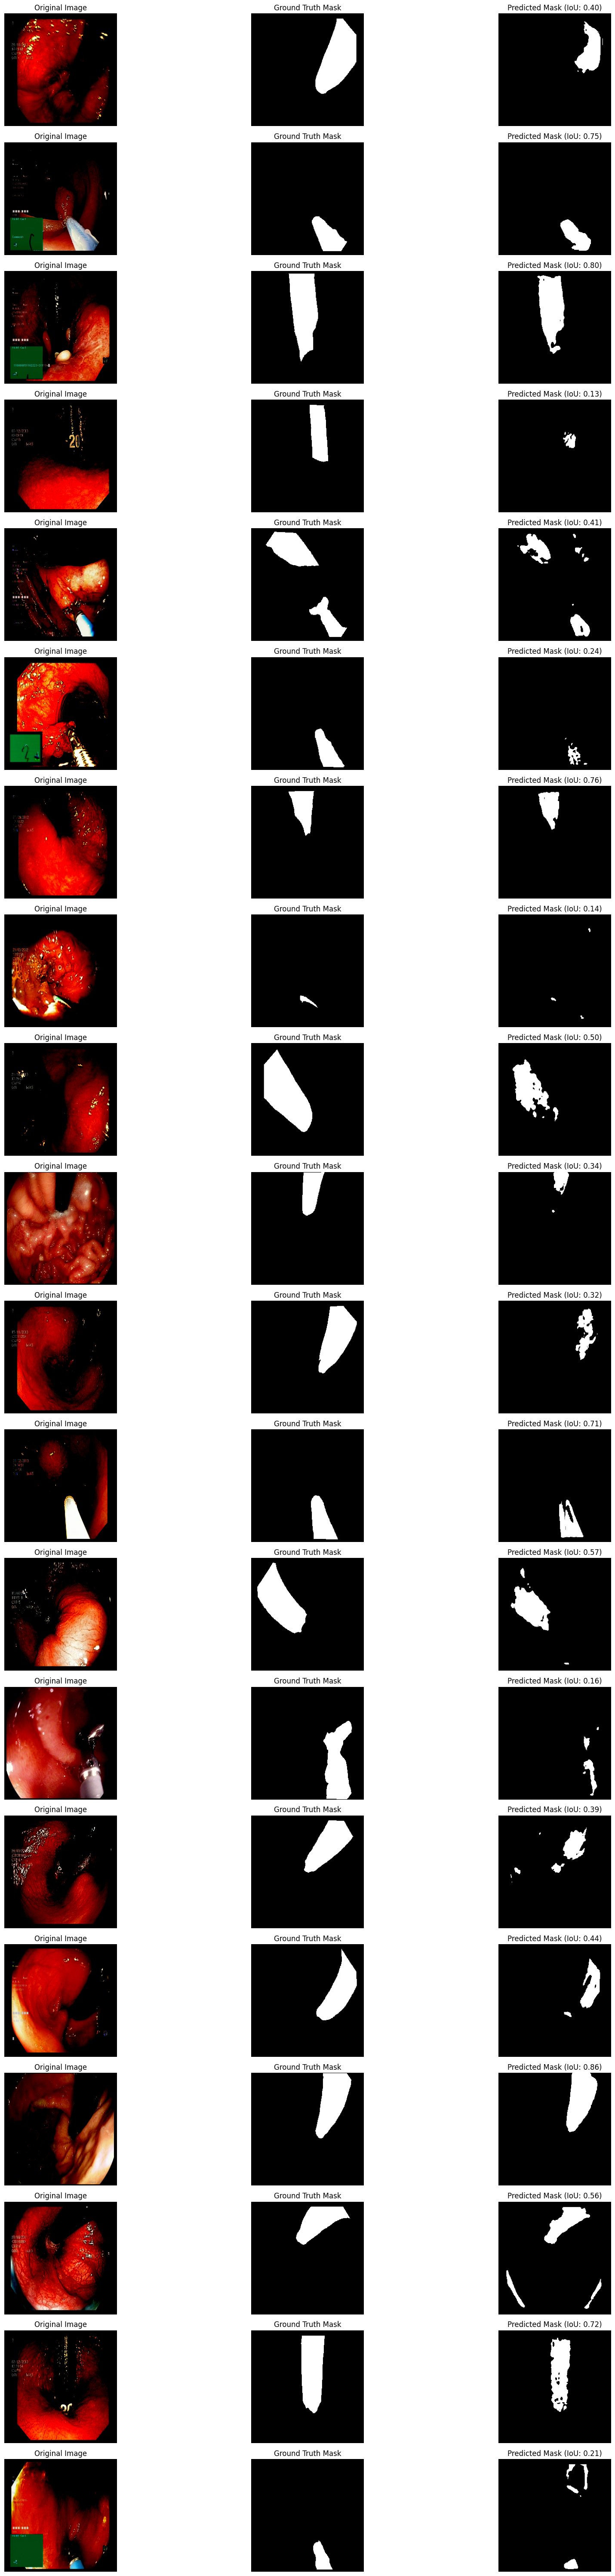

Image 1 IoU: 0.40
Image 2 IoU: 0.75
Image 3 IoU: 0.80
Image 4 IoU: 0.13
Image 5 IoU: 0.41
Image 6 IoU: 0.24
Image 7 IoU: 0.76
Image 8 IoU: 0.14
Image 9 IoU: 0.50
Image 10 IoU: 0.34
Image 11 IoU: 0.32
Image 12 IoU: 0.71
Image 13 IoU: 0.57
Image 14 IoU: 0.16
Image 15 IoU: 0.39
Image 16 IoU: 0.44
Image 17 IoU: 0.86
Image 18 IoU: 0.56
Image 19 IoU: 0.72
Image 20 IoU: 0.21


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def display_predictions(images, true_masks, predicted_masks, ious, num_images=20):
    plt.figure(figsize=(20, num_images * 3))

    for i in range(num_images):
        # Original Image
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[i].cpu().numpy().transpose(1, 2, 0))  # From (C, H, W) to (H, W, C)
        plt.title("Original Image")
        plt.axis('off')

        # Ground Truth Mask
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(true_masks[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title("Ground Truth Mask")
        plt.axis('off')

        # Predicted Mask
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(predicted_masks[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title(f"Predicted Mask (IoU: {ious[i]:.2f})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Function to calculate IoU for each image
def calculate_iou_per_image(true_masks, predicted_masks, threshold=0.5):
    ious = []
    batch_size = true_masks.size(0)

    for i in range(batch_size):
        pred_mask = (predicted_masks[i] > threshold).float()
        true_mask = true_masks[i].float()

        # Calculate Intersection and Union
        intersection = (pred_mask * true_mask).sum()
        union = pred_mask.sum() + true_mask.sum() - intersection

        if union == 0:
            iou = 0.0
        else:
            iou = intersection / union  # IoU formula

        ious.append(iou.item())

    return ious

# Collect images from multiple batches
collected_images = []
collected_masks = []
collected_pred_masks = []
collected_ious = []

num_images_needed = 20
collected_so_far = 0

# Iterate over the test_loader to collect images until we have enough
for images, masks in test_loader:
    images, masks = images.to(device), masks.to(device)

    # Set model to evaluation mode and predict masks
    model_UNetLeakyReLU.eval()
    with torch.no_grad():
        predicted_masks = model_UNetLeakyReLU(images)
        predicted_masks = (predicted_masks > 0.51).float()

    # Calculate IoU for each image
    ious = calculate_iou_per_image(masks, predicted_masks)

    # Append to the collected lists
    collected_images.extend(images.cpu())
    collected_masks.extend(masks.cpu())
    collected_pred_masks.extend(predicted_masks.cpu())
    collected_ious.extend(ious)

    collected_so_far += len(images)

    if collected_so_far >= num_images_needed:
        break

# Convert collected data to tensors
collected_images = torch.stack(collected_images)[:num_images_needed]
collected_masks = torch.stack(collected_masks)[:num_images_needed]
collected_pred_masks = torch.stack(collected_pred_masks)[:num_images_needed]
collected_ious = collected_ious[:num_images_needed]

# Show the predictions, ground truth, original images, and IoUs
display_predictions(collected_images, collected_masks, collected_pred_masks, collected_ious, num_images=num_images_needed)

# Show IoU accuracy % for each image
for idx, iou in enumerate(collected_ious):
    print(f"Image {idx + 1} IoU: {iou:.2f}")




---


## 🌟 **Comparison of Run Summary  for Activation Function**

---


| **Metric**           | **Leaky ReLU (Red)**      | **Tanh (Blue)**           | **ReLU (Green)**            |
|-----------------------|---------------------|---------------------|---------------------|
| **Epoch**            | 30                | 18                | 24                 |
| **Test Accuracy**    | 95.98429          | 94.54467          | 96.00187           |
| **Test DSC**         | 0.80748           | 0.67937           | 0.78156            |
| **Test F1-Score**    | 0.80748           | 0.67937           | 0.78156            |
| **Test IoU**         | 0.67713           | 0.51443           | 0.64144            |
| **Test Loss**        | 0.097709          | 0.12868           | 0.10716            |
| **Test Precision**   | 0.72995           | 0.75131           | 0.79637            |
| **Test Recall**      | 0.90345           | 0.62              | 0.76729            |
| **Train Accuracy**   | 95.72301          | 93.36602          | 95.03563           |
| **Train DSC**        | 0.77413           | 0.63026           | 0.72614            |
| **Train IoU**        | 0.63931           | 0.47117           | 0.58021            |
| **Train Loss**       | 0.11391           | 0.16172           | 0.12944            |


## ▶ **Plot the result into Wandb Report**


---

To keep the code more intuitive and easier to follow, we integrated the results with the W&B (Weights & Biases) library, which automatically generates interactive metric plots. You can view the interactive plots by following this link:[Click to view an interactive visualization dashboard](https://api.wandb.ai/links/kandidat18-kristiania-university-college/91fe0cxw)



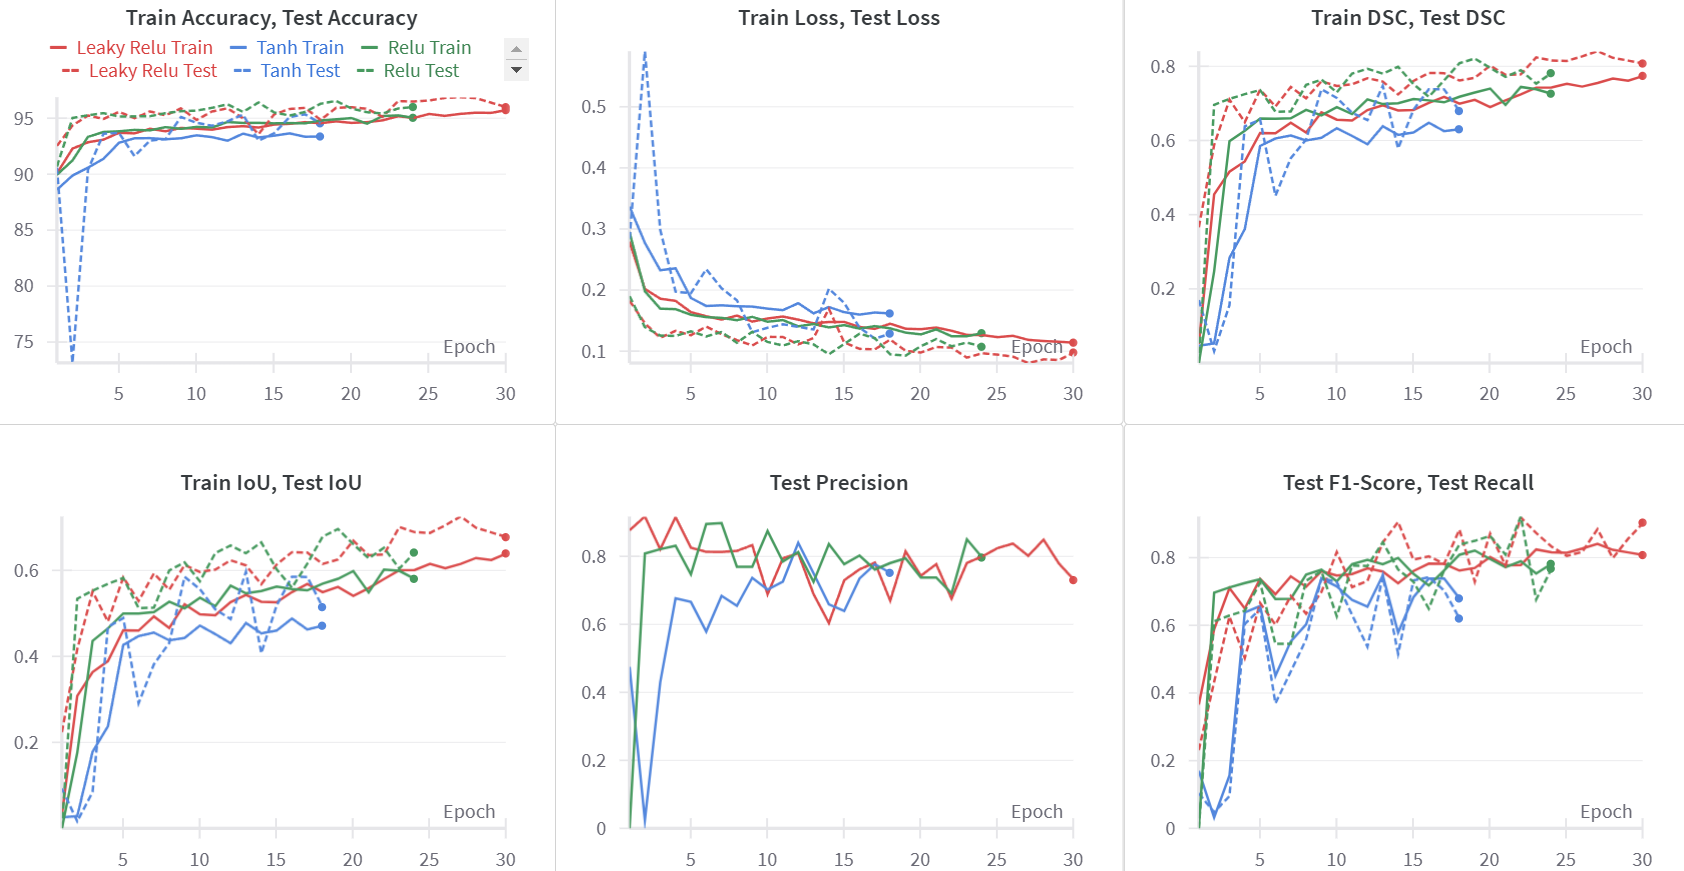

▶  **Save the model state dictionary**


In [ ]:
torch.save(model.state_dict(), 'unet_model.pth')